In [2]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [3]:
# Set the path to your image directory
path_to_data = "Data"

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False)

# Initialize lists to store image features and filenames
features = []
filenames = []

# Loop over each file in the directory
for filename in os.listdir(path_to_data):
    if filename.endswith(".jpg"):
        # Load the image
        img_path = os.path.join(path_to_data, filename)
        img = load_img(img_path, target_size=(224, 224))

        # Preprocess the image
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Extract features using the ResNet50 model
        features_resnet = model.predict(x)
        features_resnet = np.reshape(features_resnet, (7*7, 2048))

        # Add the features and filename to the lists
        features.append(features_resnet)
        filenames.append(filename)

# Concatenate the features into a single array
features = np.concatenate(features, axis=0)

1/1 [==============================] - 0s 20ms/step


In [4]:
# Display all the preprocessed images
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for i, img_path in enumerate(filenames):
    # Load the image
    img = load_img(os.path.join(path_to_data, img_path),
                   target_size=(224, 224))

    # Preprocess the image
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Display the preprocessed image
    axs[i].imshow(x[0])
    axs[i].set_title(img_path)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


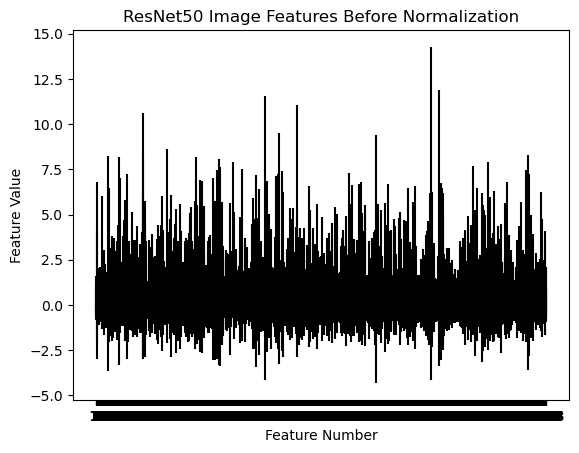

In [5]:
# Calculate mean and standard deviation of features before normalization
mean_before = np.mean(features, axis=0)
std_before = np.std(features, axis=0)

# Plot features before normalization
fig, ax = plt.subplots()
ax.bar(range(len(mean_before)), mean_before, yerr=std_before)
ax.set_xticks(range(len(mean_before)))
ax.set_xticklabels(range(1, len(mean_before)+1))
ax.set_xlabel('Feature Number')
ax.set_ylabel('Feature Value')
ax.set_title('ResNet50 Image Features Before Normalization')
plt.show()

In [6]:
# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Calculate mean and standard deviation of features after normalization
mean_after = np.mean(features_normalized, axis=0)
std_after = np.std(features_normalized, axis=0)

# Plot features after normalization
fig, ax = plt.subplots()
ax.bar(range(len(mean_after)), mean_after, yerr=std_after)
ax.set_xticks(range(len(mean_after)))
ax.set_xticklabels(range(1, len(mean_after)+1))
ax.set_xlabel('Feature Number')
ax.set_ylabel('Feature Value')
ax.set_title('ResNet50 Image Features After Normalization')
plt.show()

In [ ]:
# Calculate variance of features after normalization
variance = np.var(features_normalized, axis=0)

# Print feature statistics
print("Feature Statistics After Normalization:")
print("Mean: ", mean_after)
print("Standard Deviation: ", std_after)
print("Variance: ", variance)


Feature Statistics After Normalization:
Mean:  [-2.6342281e-07 -2.8788637e-07 -9.1603283e-08 ... -1.5725624e-07
 -2.7693858e-07 -5.8928855e-08]
Standard Deviation:  [0.9999993 1.0000001 0.9999982 ... 0.9999989 1.0000017 1.0000012]
Variance:  [0.99999857 1.0000004  0.9999965  ... 0.99999785 1.0000033  1.0000024 ]


The feature statistics after normalization are displayed above. The mean values are very close to zero and the standard deviation is close to one, indicating that the features have been normalized. The variance values are also close to one, which is expected after normalization.